In [1]:
import numpy  as np
import pandas as pd
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='muted', font_scale=1.5)

### 1. Read dataset

In [2]:
data = load_iris()
print(dir(data))  # 查看data所具有的属性或方法
print(data.DESCR)  # 查看数据集的简介

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.2

In [3]:
#直接读到pandas的数据框中
iris_dataset = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_dataset.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


#### Plot 2 features

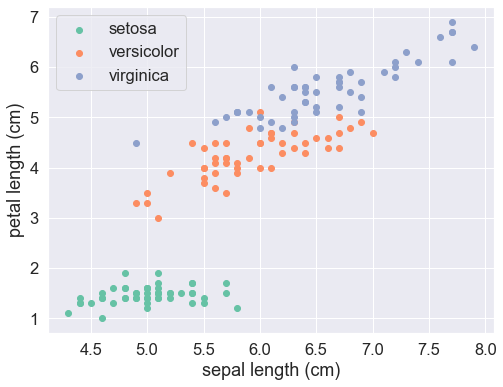

In [4]:
plt.figure(figsize=(8, 6))
# List of RGB triplets
rgb_values = sns.color_palette("Set2", len(data.target_names))
color_map = dict(zip(np.unique(data.target), rgb_values))
for i, name in enumerate(data.target_names):
    plt.scatter(iris_dataset.loc[data.target==i, 'sepal length (cm)'], iris_dataset.loc[data.target==i, 'petal length (cm)'], color=color_map[i], label=name)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

### 2. PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(iris_dataset.values)

PCA(n_components=2)

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [7]:
X_pca = pca.transform(iris_dataset.values)

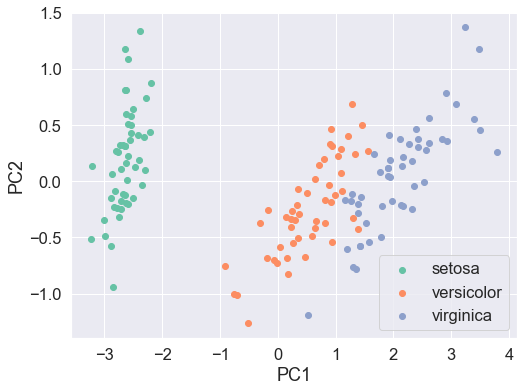

In [8]:
plt.figure(figsize=(8, 6))
# List of RGB triplets
rgb_values = sns.color_palette("Set2", len(data.target_names))
color_map = dict(zip(np.unique(data.target), rgb_values))
for i, name in enumerate(data.target_names):
    plt.scatter(X_pca[data.target==i, 0], X_pca[data.target==i, 1], color=color_map[i], label=name)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### 3. Calculate PCs from scratch

When $X$ is centered, covariance matrix $C = X^TX / (n-1)$, see: https://stats.stackexchange.com/a/285358/134555



In [9]:
iris_dataset_centered = iris_dataset - iris_dataset.mean(axis=0)

In [10]:
COV1 = iris_dataset_centered.values.T @ iris_dataset_centered.values / (iris_dataset.shape[0] - 1)
COV1

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [11]:
COV2 = np.cov(iris_dataset.values.T)
COV2

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

#### 3.1 method1: Eigendecomposition of covariance matrix (C)
- `linalg.eig(C)`: Compute the eigenvalues and right eigenvectors of a square array.
- https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
- https://stackoverflow.com/a/50489172/2803344

$eig(C) = v w v^T$, where $w$ is the eigen values and $v$ is the normalized (unit “length”) eigenvectors of $C$ and $X^TX$.

- Principal components are given by $X_{PCA} = (X - \bar{X})v$
- https://stats.stackexchange.com/a/134283/134555

In [12]:
w, v = LA.eig(COV1)
print(w)
print(v)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [13]:
pca.components_  # same as the normalized eigenvectors of first 2 PCs

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [14]:
pca.explained_variance_  # same as the eigen values calculated from eig(C)

array([4.22824171, 0.24267075])

In [15]:
v @ np.diag(w) @ LA.inv(v)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [16]:
X_pca2 = iris_dataset_centered.values @ v
X_pca2[0:5, :]  # PC1 -> PC4

array([[-2.68412563e+00, -3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00,  1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00,  1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00,  3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00, -3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02]])

In [17]:
X_pca[0:5, :]  # PC1, PC2；与上面的结果方向相反

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

#### 3.2 method2: SVD of X
- $X = USV^{T}$, and principle components are given by $US$
- https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

`u @ np.diag(s) @ vh` will recover X

In [18]:
u, s, vh = LA.svd(iris_dataset_centered.values, full_matrices=False)

In [19]:
print(u.shape, s.shape, vh.shape)

(150, 4) (4,) (4, 4)


In [20]:
X_recovered = u @ np.diag(s) @ vh
X_recovered[0:5, :]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

In [21]:
X_pca3 = u @ np.diag(s)
X_pca3[0:5, :]  # PC1 -> PC4

array([[-2.68412563e+00, -3.19397247e-01,  2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00,  1.77001225e-01,  2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00,  1.44949426e-01, -1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00,  3.18298979e-01, -3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00, -3.26754513e-01, -9.00792406e-02,
        -6.12585926e-02]])

In [22]:
s

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [23]:
np.diag(s).T

array([[25.09996044,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  6.01314738,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.41368064,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.88452351]])

### 4. Understanding How Features Contribute to PCs
- Loading of each features: columns of $v$ multiplied by the square root of corresponding eigenvalues, that is, eigenvectors scaled up by the variances, are called `loadings` in PCA or in Factor analysis [wiki](https://en.wikipedia.org/wiki/Principal_component_analysis).
- Loadings are the **covariances/correlations** between the original variables and the unit-scaled components.
- https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html

$\text{Loadings} = \text{Eigenvectors} \cdot \sqrt{\text{Eigenvalues}}$
- https://stats.stackexchange.com/q/143905/134555


Eigenvalues ($w$) are also the sum of squared component loadings across all items for each component, which represent the amount of variance in each item that can be explained by the principal component.
Eigenvectors represent a weight for each eigenvalue. The eigenvector times the square root of the eigenvalue gives the **component loadings** which can be interpreted as the correlation of each item with the principal component. 
- https://stats.oarc.ucla.edu/spss/seminars/efa-spss/

In [24]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

array([[ 0.743108  ,  0.32344628],
       [-0.17380102,  0.35968937],
       [ 1.76154511, -0.08540619],
       [ 0.73673893, -0.03718318]])

In [25]:
np.square(loadings).sum(axis=0)  # the sum of squared component loadings across all features for PC1 and PC2

array([4.22824171, 0.24267075])

In [26]:
# Component Matrix
com_matrix = pd.DataFrame(data=loadings, index=iris_dataset.columns, columns=['PC1', 'PC2'])
com_matrix

,PC1,PC2
sepal length (cm),0.743108,0.323446
sepal width (cm),-0.173801,0.359689
petal length (cm),1.761545,-0.085406
petal width (cm),0.736739,-0.037183
